In [1]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
wine_data = pd.read_csv('/content/winequality-red.csv')

Check Data Samples

In [4]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
wine_data.shape

(1599, 12)

Features

In [6]:
features_list = wine_data.columns[:-1].values   #using values columns becomes an array
label = [wine_data.columns[-1]]

print(f"Features List: {features_list}")
print(f"Labels : {label}")

Features List: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Labels : ['quality']


Data Statistics

In [7]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
frequency = wine_data.quality.value_counts()
frequency

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
sns.set() #for default asthetic parameters for plots

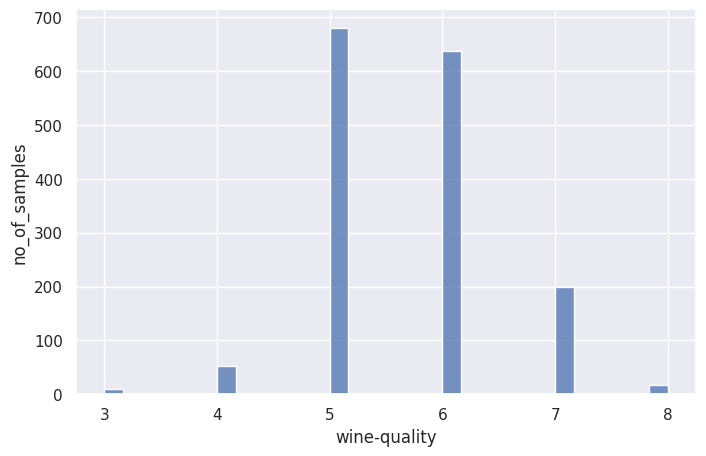

In [11]:
plt.figure(figsize=(8,5))

sns.histplot(wine_data.quality)

plt.xlabel('wine-quality')
plt.ylabel('no_of_samples')
plt.show()

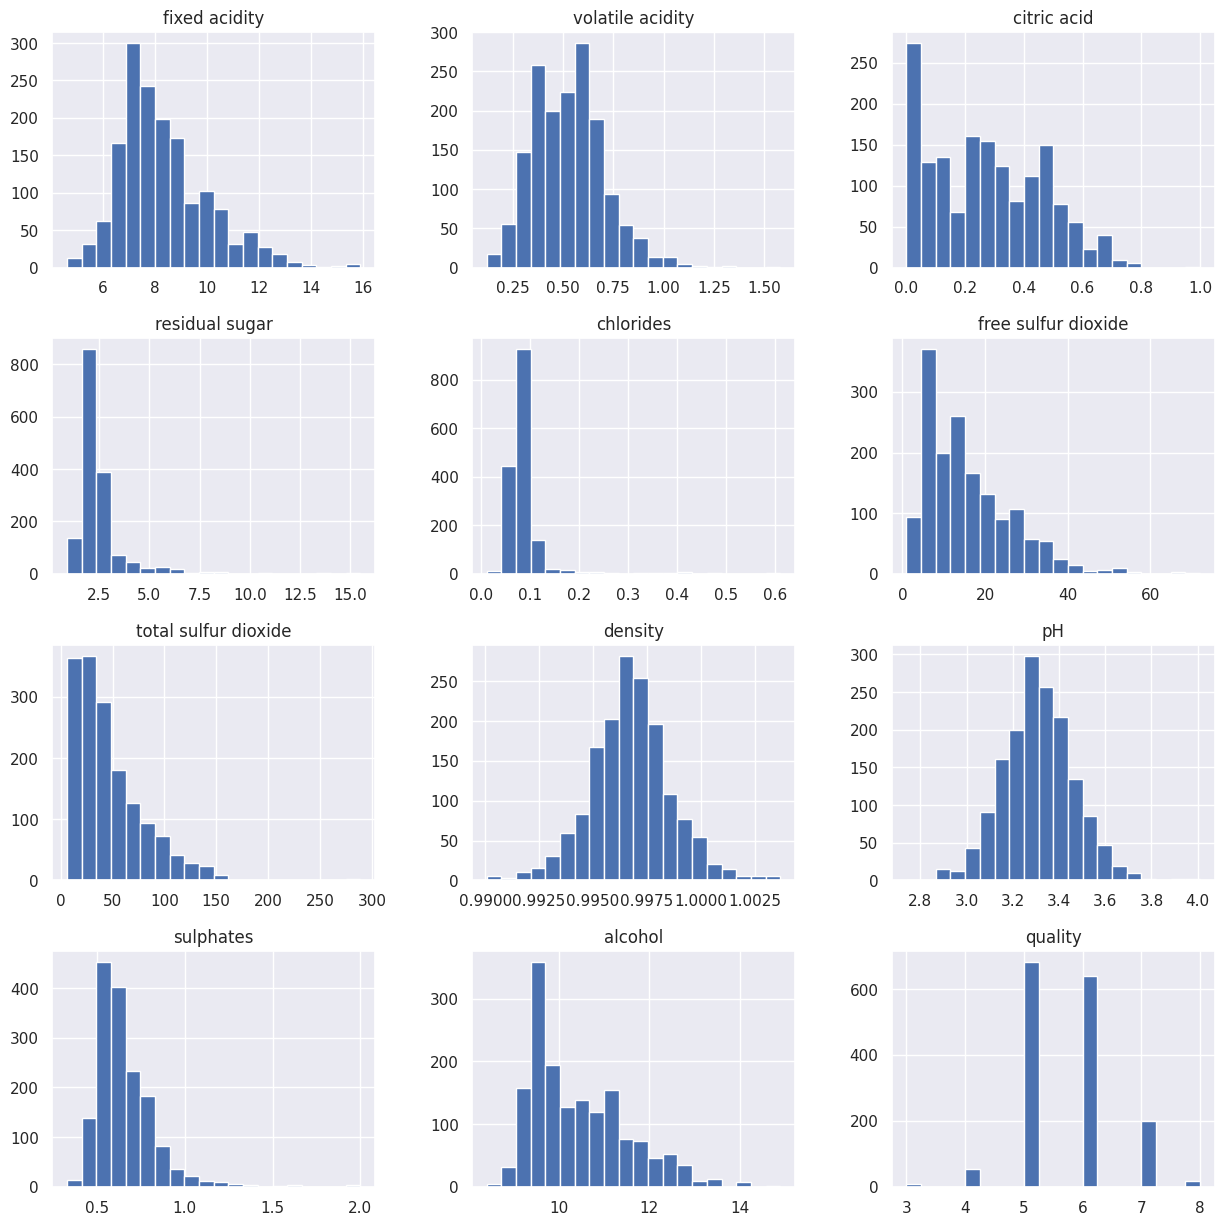

In [12]:
wine_data.hist(bins=20, figsize=(15,15))
plt.show()

We have few observations here in this histogram:

**Historgram basically tells us that how many samples lie between a specific range.**

* Features are at different scales.
* Features have different distribution.
* Features have single or multiple modal.

Before any further exploration, it's good idea to separate the test test and don't look at it in order to have clean evalution set.

### Step 3. Data Visualization

* Performed on training set

(Suppose we performed data visualization using whole dataset and it is sort of linear in graph and because of its sort of linear nature we use Linear Regression model for that dataset. But we have to train the model with training set only and it might possible that the training set is not sort of linear after separating test set and training set from whole data. So model performance will be affected.)

* In case of large training set-
  * Sample examples to form **exploration set**.

* Enables to understand features and their relationship among themselves and with output lables.


In our case we have small training set and we use it all for data exploration. There is no need to create a separate exploration set.

It's good idea to create a copy of training set so that we can freely manipulate it without worrying about any manipulation in the original set.

In [13]:
exploration_set = wine_data.copy()

Scatter Visualization

With seaborn library:

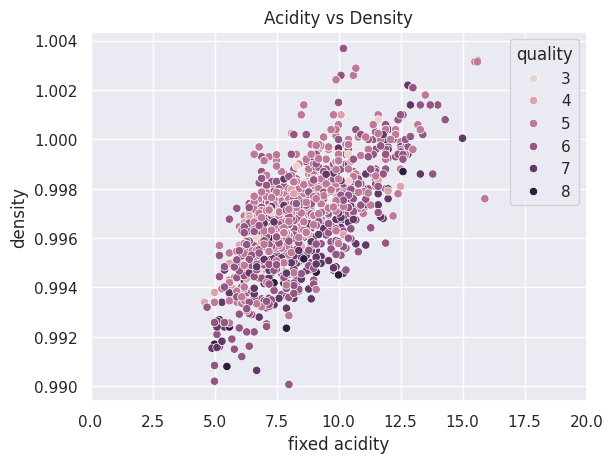

In [14]:
plt.xlim([0,20])
plt.grid(True)

sns.scatterplot(x='fixed acidity', y='density', data=exploration_set, hue='quality')

plt.title('Acidity vs Density')
plt.show()

With matplotlib

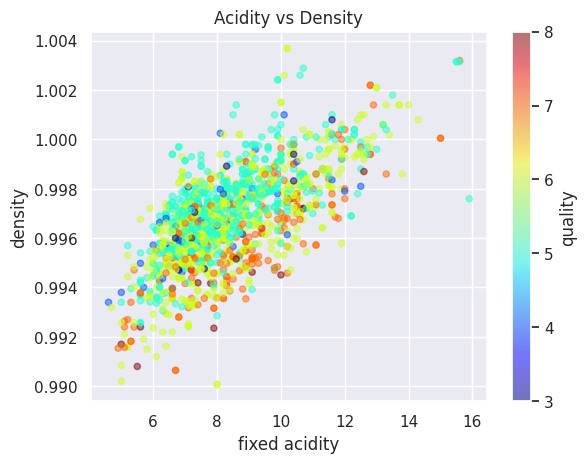

In [15]:


exploration_set.plot(kind='scatter', x='fixed acidity', y='density', c='quality', alpha=0.5, cmap=plt.get_cmap('jet'))

plt.title('Acidity vs Density')
plt.show()

Relationship between features


* **Standard correlation coefficient **between features.
* Ranges between -1 to +1 **Correlation = +1**:Strong positive correlation between features **Correlation = -1** Strong negative correlation among features **Correlation = 0** No linear relationship between features
* Visualization using heat map
* Only captures linear relationship between features.
  * For non-linear relationship, use **Rank Correlation**

In [16]:
corr_matrix = exploration_set.corr()
corr_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [17]:
corr_matrix['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Here we can observe that quality has strong correlation of **0.48** with `alcohol` and strong negative correlation of **-0.39** with `volatile acidity`.

<Axes: >

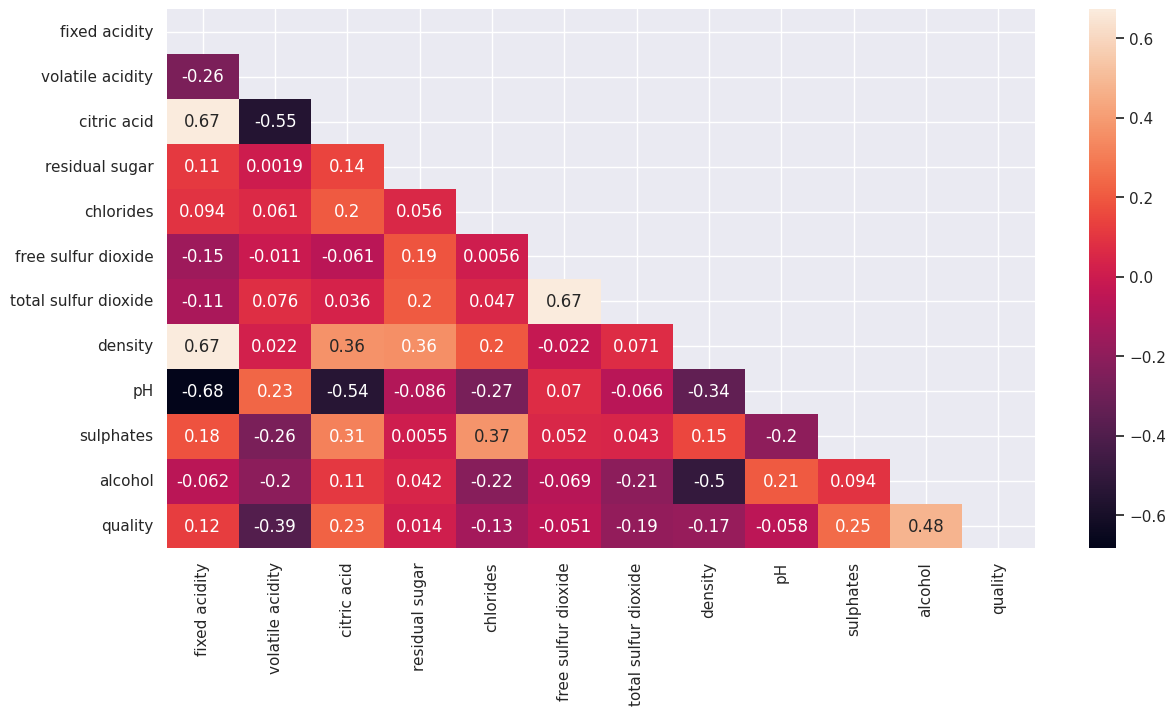

In [18]:
plt.figure(figsize=(14,7))
mask=np.triu(corr_matrix)     # returns a boolean array(Matrix) in which upper triangular is True and lower triangular is False.
sns.heatmap(corr_matrix, annot=True, mask=mask)   # Annot says display the correlation values in the heat map, and mask says display only that part which is False and don't display the part that is True.

Here we can notice that
* Darker colors represent strong negative correlation
* Fainter colors represent strong positive correlation

We have one another method to visualize the relationship among the features, ie **scatterplot**

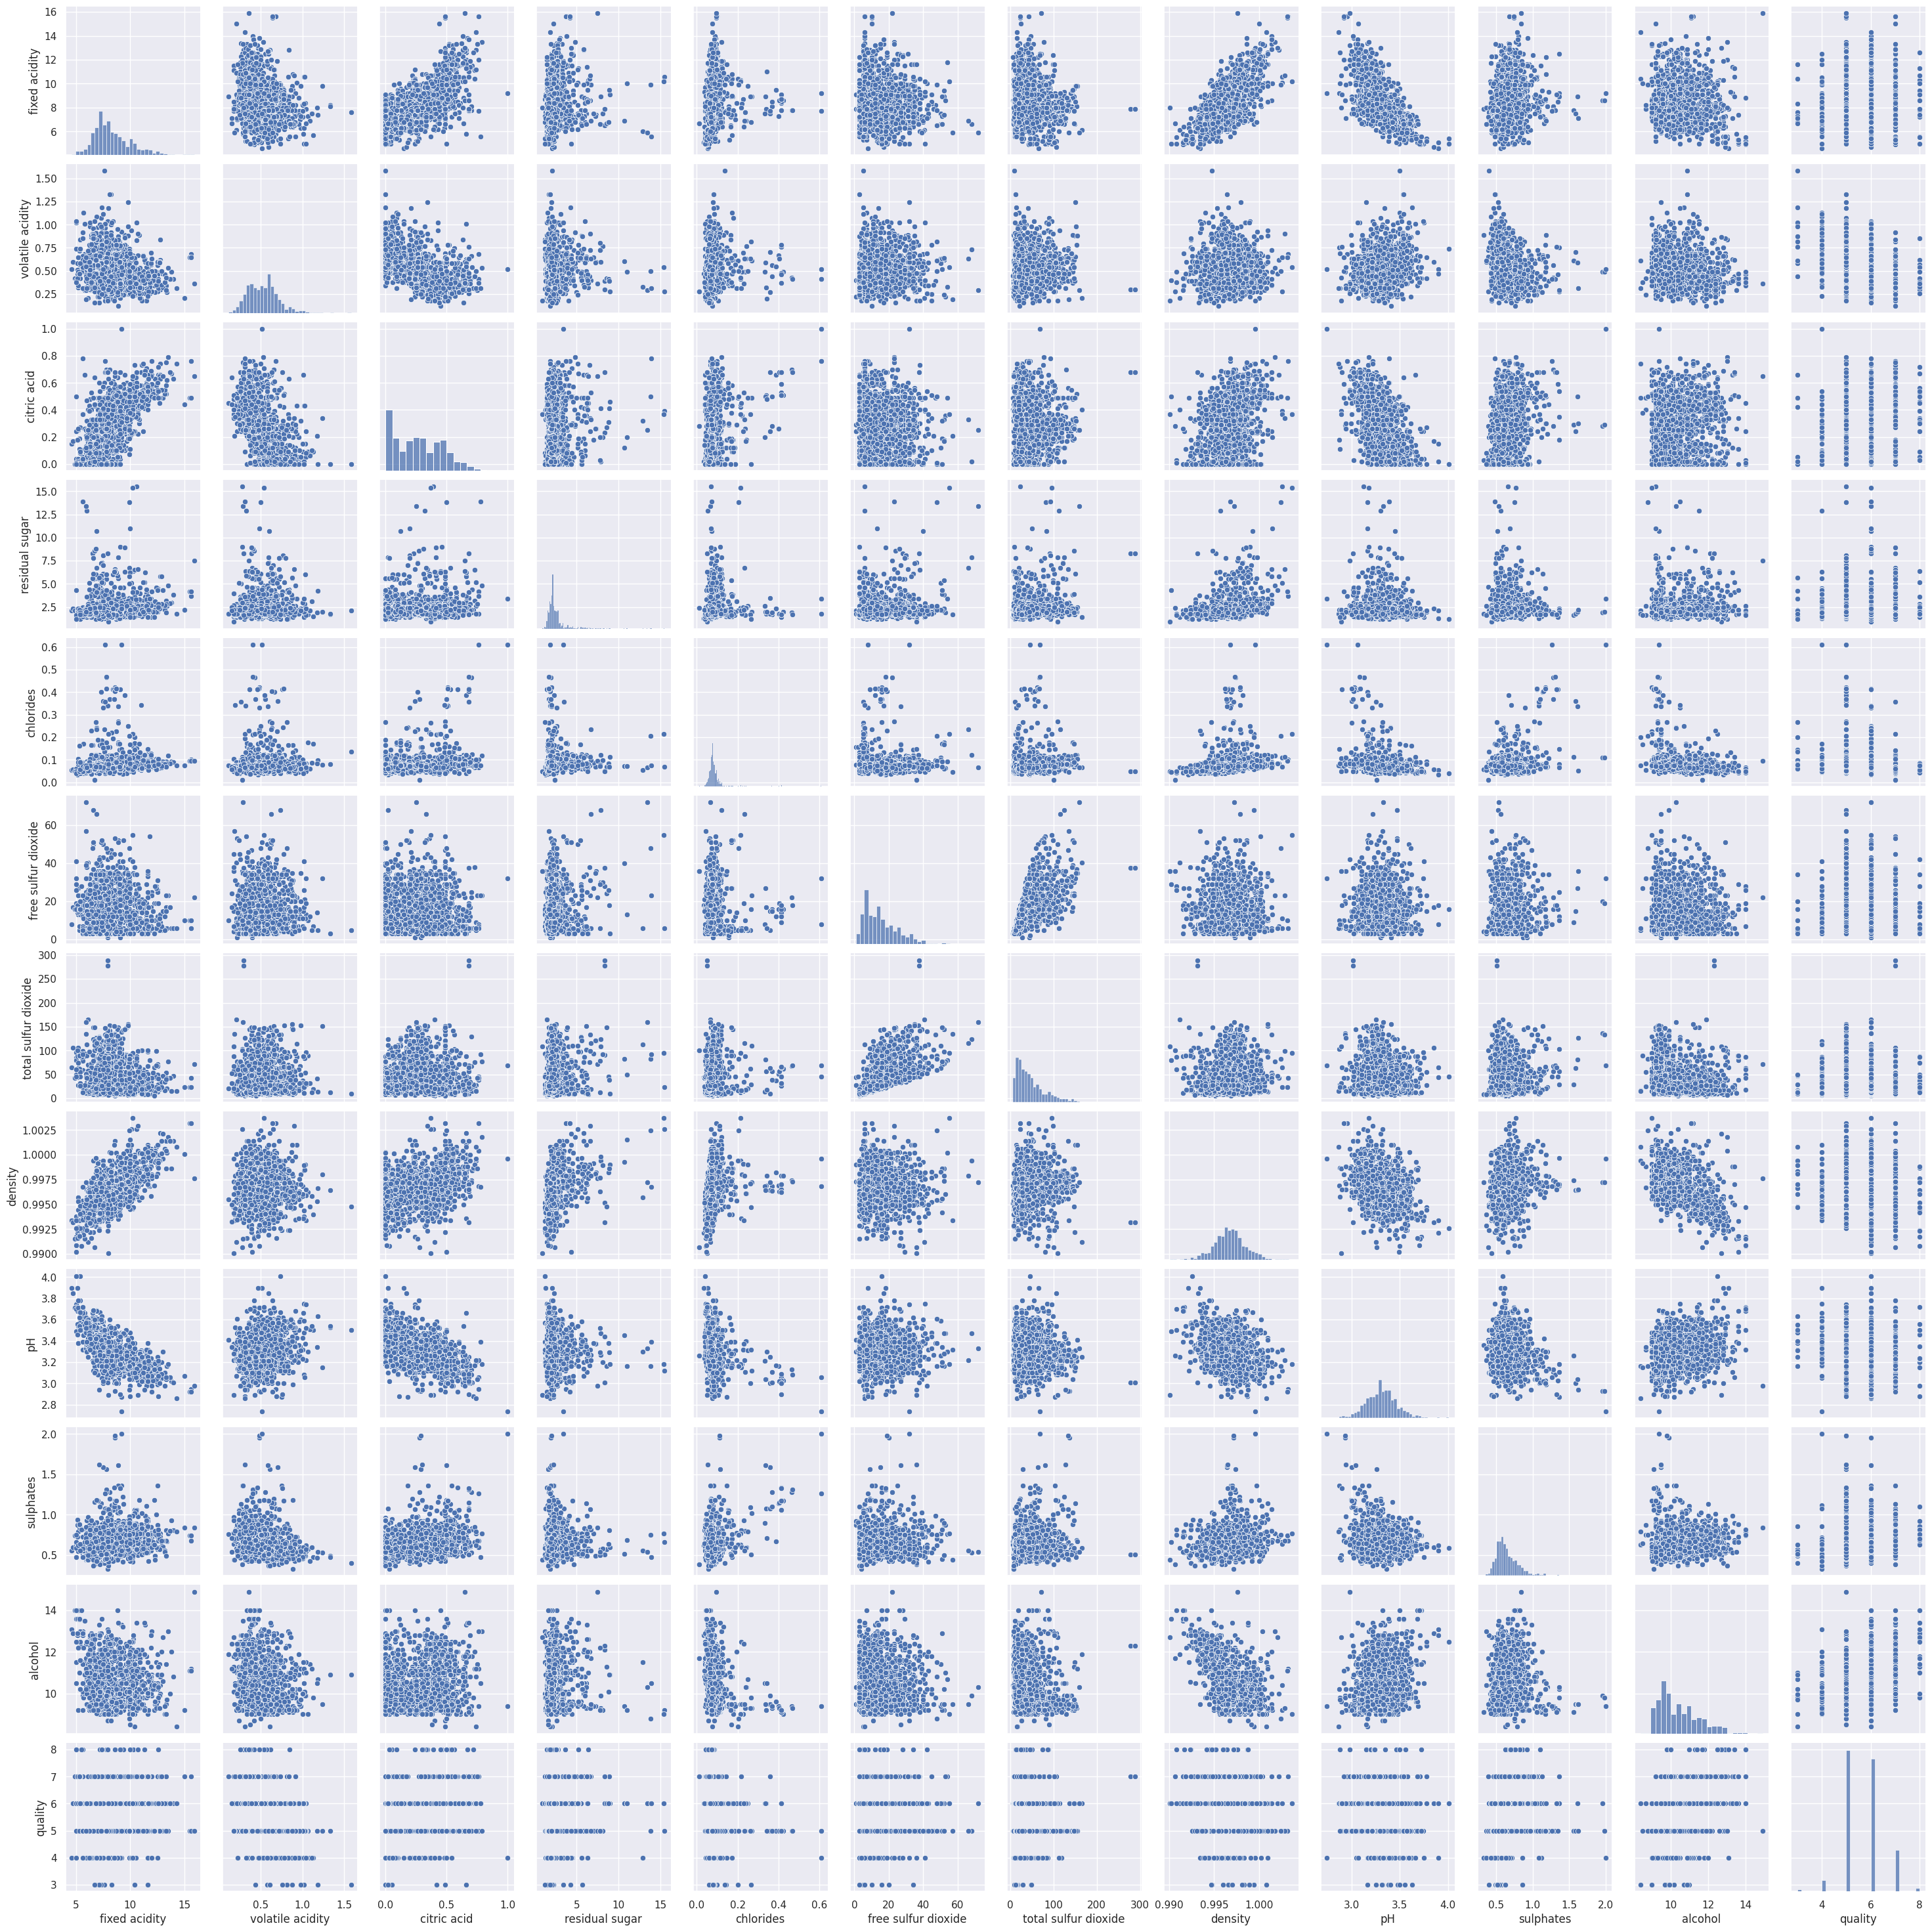

In [19]:
sns.pairplot(exploration_set)

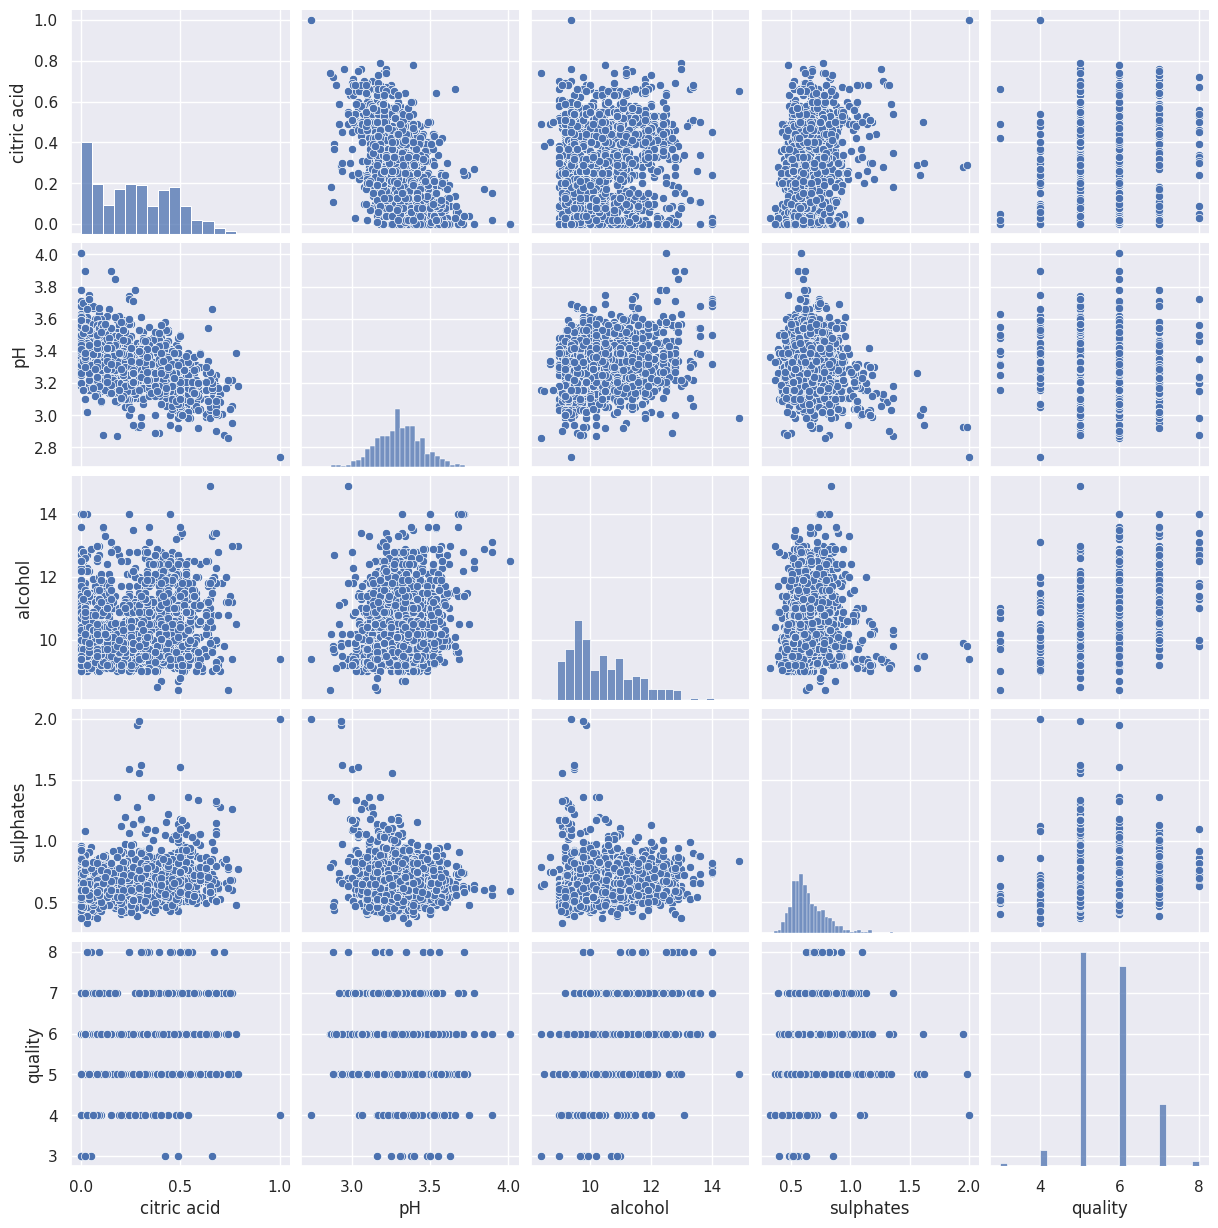

In [20]:
features_set = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
sns.pairplot(exploration_set[features_set])
plt.show()

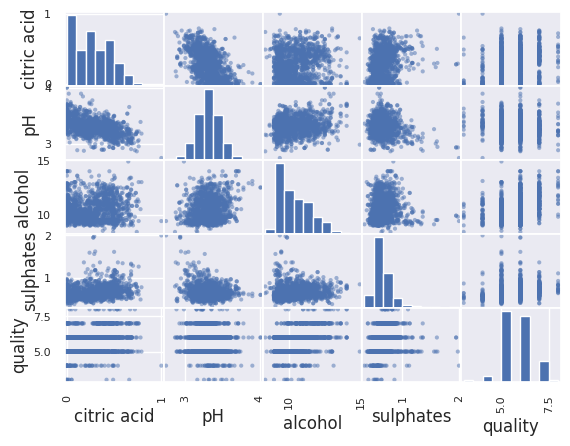

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(exploration_set[features_set])
plt.show()

Note of wisdom

1.Visualization and data exploration
do not have to be absolutely thorough.

2.Objective is to get quick insight into features and its relationship with other features and labels.

3.Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.





In [22]:
X = wine_data.iloc[:,:-1]
y= wine_data.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

## Select and train ML model

1. Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.39002514396395427

Let's visualize the error between the actual and predicted values.

Text(0, 0.5, 'Predicted_Quality')

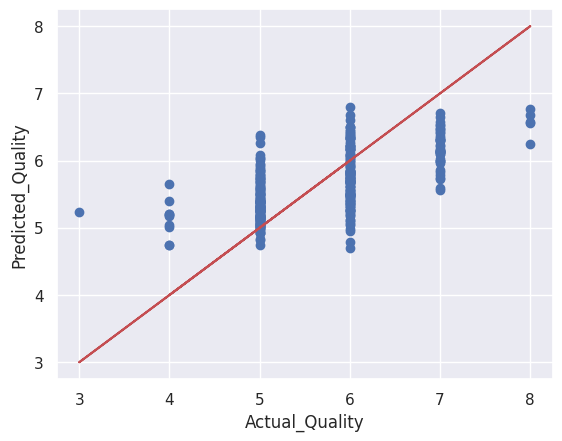

In [28]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual_Quality')
plt.ylabel('Predicted_Quality')

2. Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [30]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred = dtr.predict(X_test)

In [32]:
mean_squared_error(y_test, y_pred)

0.61875

In [33]:
y_pred_train = dtr.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.0

Notes that training error is 0 and test error 60. This is an example of an overfitted model.

Text(0, 0.5, 'Predicted_Quality')

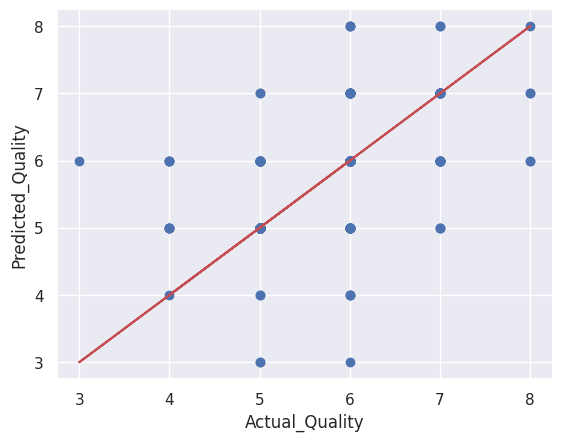

In [34]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual_Quality')
plt.ylabel('Predicted_Quality')

We can use cross-validation for robust evaluation of model performance.

In [35]:
from sklearn.model_selection import cross_val_score

* Cross validation provides a separate MSE for each validation set, which we can use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate.

* The additional cost we pay in cross validation is additional training runs, which may be too expensive in certain cases.

In [36]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

Linear Regression CV

In [37]:
scores = cross_val_score(lr, X_train, y_train,
                         scoring = 'neg_mean_squared_error', cv=10)

lr_scores = -scores
display_scores(lr_scores)

Scores: [0.39158054 0.51354046 0.47883933 0.4912904  0.46152392 0.45394686
 0.44549394 0.46091861 0.24596434 0.42026844]
Mean: 0.4363366846653878
Standard deviation: 0.07135991978388642


Decision Tree CV

In [38]:
scores = cross_val_score(dtr, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)

dtr_score = -scores
display_scores(dtr_score)

Scores: [0.5546875  0.703125   0.6484375  0.609375   0.71875    0.6328125
 0.546875   0.640625   0.453125   0.69291339]
Mean: 0.6200725885826771
Standard deviation: 0.07806985588910122


On comparing Linear Regression and Decision Tree Regression-
We found that LinearRegression has better MSE and more precise estimation compared to DT.

### Random Forest CV

* Random forest model builds multiple decision trees on randomly selected features and then average their predictions.

* Building a model on top of other model is called *ensemble learning*, which is often used to improve performance of ML models.

In [39]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

scores = cross_val_score(rfr, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)

rfr_scores = -scores
display_scores(rfr_scores)

Scores: [0.36046172 0.46107266 0.37348516 0.31980078 0.37847109 0.3920125
 0.30482734 0.46241484 0.21845547 0.33429843]
Mean: 0.36052999876968506
Standard deviation: 0.06899647934395373


In [40]:
y_pred = rfr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.30264906249999995

Text(0, 0.5, 'Predicted_Quality')

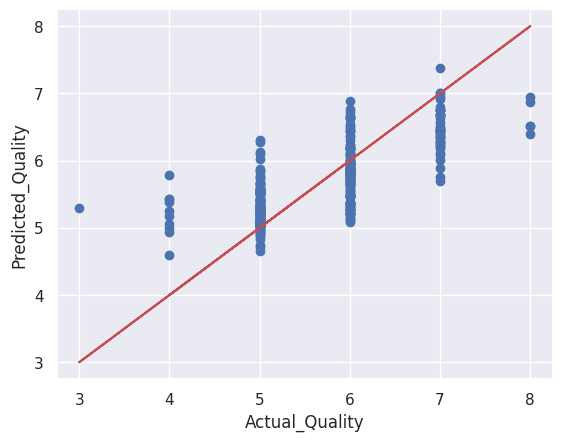

In [41]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual_Quality')
plt.ylabel('Predicted_Quality')

## Finetune the Model

* Usually there are number of hyperparameters in the model, which are set manually.
* Tuning these hyperpaprameters lead to better accuracy of ML models.
* Finding the best combination of hyperpaprameters si a seach problem in the space of hyperparameters, which is huge.

### Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

* We need to specify list of hyperparameters along with a range of values to try.
* It automatically evaluates all possible combination of hyperparameter values using cross validation.

In [43]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
     {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

Here the parameter grid contains two combinations:

1.The first combination contains `n_estimators` with 3 values and `max_features` with 4 values.

2.The second combination has an additional `bootstrp` parameter, which is set to `False`. Note that it was set to its default value, which is `True`, in the first grid.

Let's compute the total combination evaluated here:


1.   The first one results in 3 x 4 = 12 combinations.
2.   The second one has 2 values of `n_estimators` and 3 values of `max_features`, thus resulting in total of 2 x 3 = 6 values.

The total number of combinations evaluated by the parameter grid = 12 + 6 = 18.



Create an object of `GridSearchCV`

In [44]:
grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

* In this case, we set `cv=5` i.e. using 5 fold cross validation for training the mdoel.

* We need to trian the model for 18 parameter combinations and each combinations would be trained 5 times as we are using cross-vlidation here.

* The total model training runs = 18 x5 = 90.

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
  print(-mean_score, params)

0.506192470043573 {'max_features': 2, 'n_estimators': 3}
0.4026748161764705 {'max_features': 2, 'n_estimators': 10}
0.37827786628540305 {'max_features': 2, 'n_estimators': 30}
0.47449925108932456 {'max_features': 4, 'n_estimators': 3}
0.4089665134803922 {'max_features': 4, 'n_estimators': 10}
0.37296273828976034 {'max_features': 4, 'n_estimators': 30}
0.48348277505446624 {'max_features': 6, 'n_estimators': 3}
0.40135955882352936 {'max_features': 6, 'n_estimators': 10}
0.37274101647603486 {'max_features': 6, 'n_estimators': 30}
0.4638868464052287 {'max_features': 8, 'n_estimators': 3}
0.3982423406862745 {'max_features': 8, 'n_estimators': 10}
0.3833541802832244 {'max_features': 8, 'n_estimators': 30}
0.4460345179738562 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3866910845588235 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.47469566993464046 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3847453737745098 {'bootstrap': False, 'max_features':

As we can notice the lowest MSE is obtained for the best parameter combination.

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

### Analysis of best model and its errors

Analysis of the model provides useful insights about features. Let's obtain the feature importance as learnt by the model:

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [50]:
sorted(zip(feature_importances, features_list), reverse=True)

[(np.float64(0.229076043641504), 'alcohol'),
 (np.float64(0.15864409641213362), 'sulphates'),
 (np.float64(0.10447704141770446), 'volatile acidity'),
 (np.float64(0.08710148382282566), 'total sulfur dioxide'),
 (np.float64(0.070132391167974), 'chlorides'),
 (np.float64(0.06485520738585007), 'density'),
 (np.float64(0.061191577613938355), 'citric acid'),
 (np.float64(0.06051848680541771), 'pH'),
 (np.float64(0.055797593056961164), 'fixed acidity'),
 (np.float64(0.05454732685082463), 'residual sugar'),
 (np.float64(0.05365875182486632), 'free sulfur dioxide')]

Evaluation on test set

In [51]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [52]:
mean_squared_error(y_test, y_pred)

0.3244097222222222

It's a good idea to get 95% confidence interval of the evaluation metric.

In [53]:
from scipy import stats
confidence = 0.95
squared_errors = (y_pred - y_test)**2
stats.t.interval(confidence, len(squared_errors)-1,
                 loc = squared_errors.mean(),
                 scale= stats.sem(squared_errors))

(np.float64(0.2624538351766524), np.float64(0.386365609267792))